# Forward Manipulator
<div>
    <img src="manipulator.png" width='500'/>
</div>

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

### Define parameters for the two link

In [2]:
l1 = 1
l2 = 1
theta1 = 0.5
theta2 = -0.3

### Prepping to get homogenous transformation

In [3]:
c1 = math.cos(theta1)
c2 = math.cos(theta2)
s1 = math.sin(theta1)
s2 = math.sin(theta2)

<div>
    <img src="homogeneous.png" width='500'/>
</div>

### Definig the translation vectors
```
Homogeneous transformation matrices have the form:
[[cos(θ), -sin(θ), x],
 [sin(θ),  cos(θ), y],
 [0,       0,      1]]
where (x,y) is the translation vector
```

In [4]:
O01 = [0, 0]    # from origin to joint 1 translation
O12 = [l1, 0]   # translation of joint 2 from x frame of link 1

In [5]:
H01 = np.array([[c1, -s1, 0],
       [s1,  c1, 0],
       [0,    0, 1]])
H12 = np.array([[c2, -s2, l1],
       [s2,  c2, 0],
       [0,    0, 1]])

## Combined transformation
H02 = np.dot(H01, H12)

In [20]:
o = np.array([[0, 0]])     # origin in world frame
o = np.transpose(o)

### Finding end of link 1 in world frame

In [7]:
P1 = np.array([[l1, 0, 1]])    # in frame 1
P1 = np.transpose(P1)
## now transform it to world frame using H01
P0 = np.dot(H01, P1)  # in world frame
p = [P0[0], P0[1]]

### End of link 2 in frame2 then world frame

In [8]:
Q2 = np.array([[l2, 0, 1]])
Q2 = np.transpose(Q2)
Q0 = np.dot(H02, Q2)
q = [Q0[0], Q0[1]]

In [9]:
p, q

([array([0.87758256]), array([0.47942554])],
 [array([1.85764914]), array([0.67809487])])

### Drawing line from origin to end of link 1

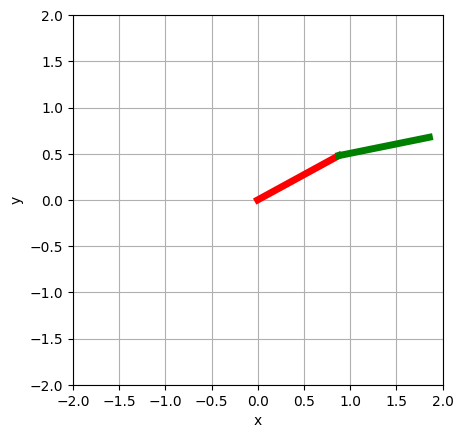

In [26]:
plt.plot([o[0], p[0]], [o[1], p[1]], linewidth=5, color='r')
plt.plot([p[0], q[0]], [p[1], q[1]], linewidth=5, color='g')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid()
plt.gca().set_aspect('equal')

In [21]:
np.shape(o), np.shape(p), np.shape(q)

((2, 1), (2, 1), (2, 1))

In [27]:
o

array([0, 0])

In [11]:
[o[0], p[0]], [o[1], p[1]]

([np.int64(0), array([0.87758256])], [np.int64(0), array([0.47942554])])